This notebook can be used to evaluate the forecast skill (ROC score) for a specific forecast dataset. It currently works for a specific index and a specific issue month but can be adapted in order to handle a list of different issue months and several accumulation periods.

In [2]:
%cd ../../

import numpy as np

from config.params import Params

from helper_fns import (
    read_forecasts_locally,
    read_observations_locally,
)

from analytical import calculate_forecast_probabilities, evaluate_forecast_probabilities

INFO:root:Set disk cache path.


In [3]:
issue = "10"

params = Params(iso='MOZ', index='SPI')

# TODO replace by downscaled forecasts (climax / bil. interp. / weighted mask) issued in 9 (1993 - 2022)
forecasts = read_forecasts_locally(
    f"data/{params.iso}/forecast/Moz_SAB_tp_ecmwf_{issue}/*.nc"
)

forecasts = forecasts.where(
    forecasts.time < np.datetime64(f"{params.year}-07-01T12:00:00.000000000"),
    drop=True,
)

# TODO replace by `rfh_daily`
observations = read_observations_locally(f"AA/data/{params.iso}/chirps")

In [4]:
period_months = (12, 1, 2) # Dec Jan Feb

probs, probs_bc, obs_values, obs_bool = calculate_forecast_probabilities(
    forecasts,
    observations,
    params,
    period_months,
    issue,
)

INFO:root:Completed accumulation
INFO:root:Completed anomaly
c:\Users\amine.barkaoui\AppData\Local\miniconda3\envs\hip-analysis-dev-env\lib\site-packages\xclim\sdba\utils.py:316: RuntimeWarning: All-NaN slice encountered in interp_on_quantiles
  warn(
c:\Users\amine.barkaoui\AppData\Local\miniconda3\envs\hip-analysis-dev-env\lib\site-packages\xclim\sdba\utils.py:316: RuntimeWarning: All-NaN slice encountered in interp_on_quantiles
  warn(
c:\Users\amine.barkaoui\AppData\Local\miniconda3\envs\hip-analysis-dev-env\lib\site-packages\xclim\sdba\utils.py:316: RuntimeWarning: All-NaN slice encountered in interp_on_quantiles
  warn(
c:\Users\amine.barkaoui\AppData\Local\miniconda3\envs\hip-analysis-dev-env\lib\site-packages\xclim\sdba\utils.py:316: RuntimeWarning: All-NaN slice encountered in interp_on_quantiles
  warn(
c:\Users\amine.barkaoui\AppData\Local\miniconda3\envs\hip-analysis-dev-env\lib\site-packages\xclim\sdba\utils.py:316: RuntimeWarning: All-NaN slice encountered in interp_on_qu

In [5]:
auc, auc_bc = evaluate_forecast_probabilities(
    probs,
    probs_bc,
    obs_bool,
)

Average AUC score: 0.6355123335444101


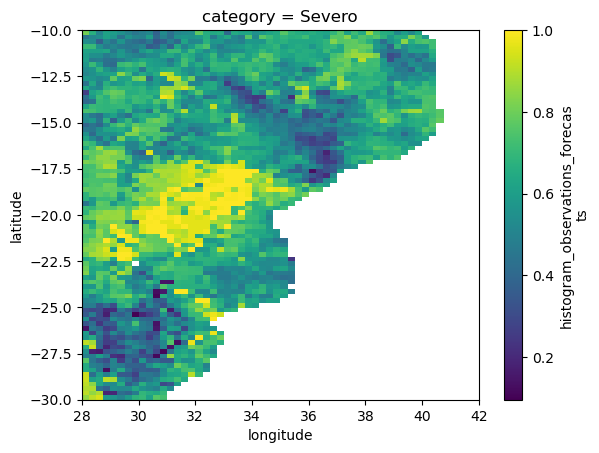

In [6]:
# Without bias correction

print(f"Average AUC score: {auc.sel(category='Severo').mean().values}")
auc.sel(category='Severo').plot.imshow()

Average AUC score: 0.5479400962402515


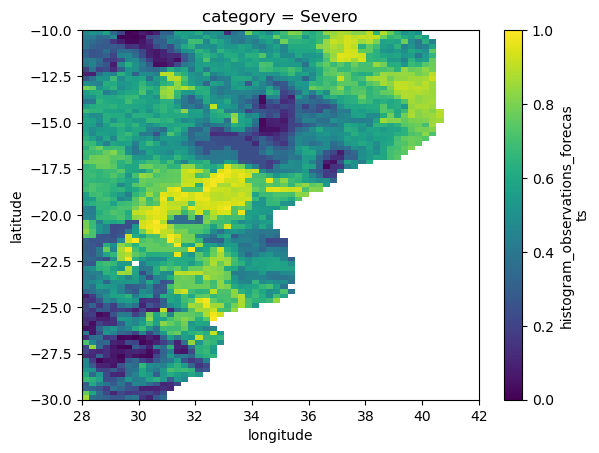

In [7]:
# With bias correction

print(f"Average AUC score: {auc_bc.sel(category='Severo').mean().values}")
auc_bc.sel(category='Severo').plot.imshow()